In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv(r"Downloads\Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

In [5]:
#position is having level hence no need to do labelencoding
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:3].values

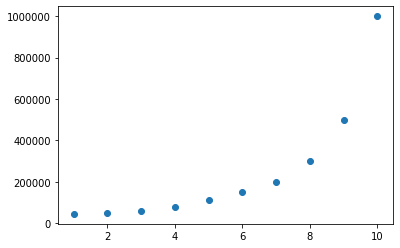

In [7]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Level'],dataset['Salary'])

In [8]:
#only 10 rows hence no need to split
#apply linear regression first then polynomial regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
#coverted in linear regression line way

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred=lin_reg.predict(x)

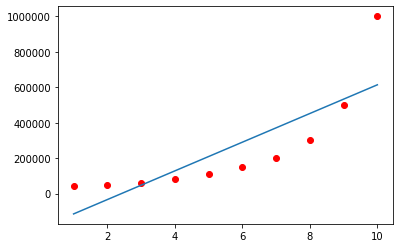

In [13]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred)
#x=questions y_pred -ans

In [14]:
y#(real values ie key)

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [15]:
y_pred#predicted for keys are this

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [16]:
#checking accuracy it is giving if we implement linear regression to it
from sklearn.metrics import r2_score
accuracy_linear=r2_score(y,y_pred)
#y-real,y_pred-machine is 0observing that values

In [17]:
accuracy_linear
#only 66 
#hence we go for polynomial graph

0.6690412331929895

In [33]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)#giving polynomial degree to x nd storing it in x_poly
#try and try method change the degrees and depending on increasing we consider if decreases we consider previous value as it is more accurate
#it is totally try and try method

In [20]:
x_poly
#below [1,1,1,1]
#[1,2,4,8,16]
#[1,3,9,27]
#these are being formed

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [21]:
#we need to make the machine understand the equation of poly
poly_reg.fit(x_poly,y)#<-------equation of poly is made by this way x should have powers nd y need notas per equation says
#if we dont do the above thing it will consider it as y=a0+a1*x1+a2*x2
#hence to convert it to poly ie y=a0+a1*x1+a2*x1.....we do the above poly_reg part

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [22]:
#linear regression is only applied but here for the x_poly and y we are applying
lin_reg_2=LinearRegression()#<-------linear regression we are converting it to
lin_reg_2.fit(x_poly,y)#<------this is linear regression formulay=mx+c

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
poly=lin_reg_2.predict(x_poly)

In [28]:
poly

array([[ 53356.64335681],
       [ 31759.90675996],
       [ 58642.19114221],
       [ 94632.86713289],
       [121724.94172497],
       [143275.05827508],
       [184003.49650349],
       [289994.17249411],
       [528694.63869452],
       [988916.08391594]])

In [24]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [26]:
accuracypoly=r2_score(y,poly)

In [27]:
accuracypoly

0.9973922891706613

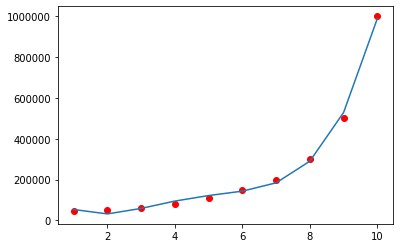

In [29]:
plt.scatter(x,y,color="red")
plt.plot(x,poly)

In [30]:
#linear polynomial regression
y=lin_reg_2.predict([[1,2,4,8,16]])

In [32]:
y[0][0]

31759.90675996107